# An Introduction to Nonlinear Dynamics and Chaos

## Introduction

We have already had a glimpse at nonlinear systems, e.g. in the case of the pendulum without the small-angle approximation. The aim of this chapter is to provide a brief foray into some of the formal aspects of the analysis of dynamical nonlinear systems, while introducing concepts such as flows in phase space, fixed points, linearization, and chaotic systems. 

All of these concepts are part of the subject of dynamics, i.e. the study of systems that evolve in time. 

We will use the computational knowledge we have gained thus far to obtain a quantitative understanding of some simple systems. 


## The Importance of being Nonlinear

There are two types of dynamical systems: differential equations and iterated maps (or difference equations). Here we will study differential equations, since we already have the machinery developed to solve them, even in their nonlinear form.

Why are nonlinear problems harder to solve than linear ones? 

The answer lies in the fact that linear systems can be broken down into parts. Each part can be solved sparately and finally recombined to get an answer. This allows for fantastic simplification of complex problems, and underlies methods such as normal modes, Laplace transforms, superposition arguments, and Fourier analysis. 

A linear system is precisely equal to the sum of its parts!

But many things in nature don't act this way, e.g. whenever parts of a system interfere, or cooperate, or compete, there are nonlinear interactions going on. 

Most of everyday life is nonlinear and the principle of superposition fails spectacularly! 

Within the realm of physics, nonlinearity is vital to the operation of a laser, the formation of turbulence in a fluid, and the superconductivity of Josephson junctions. 


## Flows on the Line

### Fixed Points and Stability

Let's start by examining a one-dimensional, or first-order system, described by a differential equation of the form: 

$\dot{x} = f(x)$,

where, as usual, $\dot{~} \equiv \mathrm{d}/\mathrm{d}t$. 

Pictures are often more helpful than formulas when analyzing a nonlinear system. 

Consider $\dot{x} = \sin x$. The general solution is: 

$t = - \ln | \csc x + \cot x | + C$.

If the initial condition is $x=x_0$ at $t=0$, then:

$t = \ln \left| \frac{ \csc x_0 + \cot x_0 }{\csc x + \cot x} \right|$.

The result is exact, but it is a headache to interpret! 

In contrast, a graphical analysis is clear and simple. 

Think of $t$ as time, $x$ as the position of an imaginary particle moving along the real line (i.e. left or right), and $\dot{x}$ the velocity of the particle. 

$\dot{x} = f(x)$ represents a *vector field* along the line. The differential equation dictates the velocity $\dot{x}$ at each $x$. 

To sketch the vector field, it is convenient to plot $\dot{x}$ versus $x$, then draw arrows on the $x$-axis to indicate the corresponding velocity vector $\dot{x}$ at each $x$. 

Arrows would point to the right when $\dot{x} > 0$ and to the left when $\dot{x} < 0$.

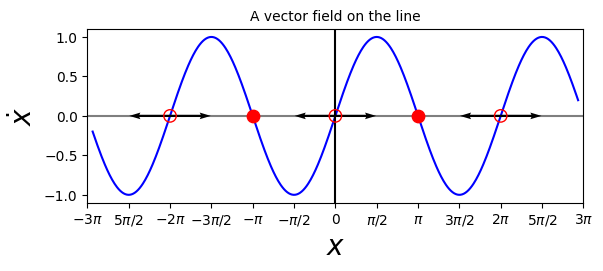

In [1]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

x = np.linspace(-3 *np.pi+0.2, 3 * np.pi-0.2, 600) # 
xdot = np.sin(x) 

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'$\dot{x}$', fontsize=20) # set the y label
ax.set_title('A vector field on the line', fontsize=10) # set the title 

# set the x and y limits:
ax.set_xlim(-3*np.pi+0.2, 3*np.pi-0.2)
ax.set_ylim(-1.1,1.1)

# make one-dimensional plots using the above arrays, add a custom label, linestyles and colors:
ax.plot(x, xdot, color='blue', linestyle='-', label='a sine curve') 

# change the axis labels to correspond to [0, pi/2, pi, 1.5 * pi, 2*pi, 2.5*pi, 3*pi]
ax.set_xticks([-3*np.pi, -2.5*np.pi, -2*np.pi, -1.5 * np.pi, -np.pi, -np.pi/2, 0, np.pi/2, np.pi, 1.5 * np.pi, 2*np.pi, 2.5*np.pi, 3*np.pi])
ax.set_xticklabels(['$-3\\pi$','$5\\pi/2$', '$-2\\pi$', '$-3\\pi/2$', '$-\\pi$','$-\\pi/2$', '0', '$\\pi/2$', '$\\pi$', '$3\\pi/2$', '$2\\pi$', '$5\\pi/2$', '$3\\pi$'])

# plot the fixed points: 
xfpu = [-2*np.pi, 0, 2*np.pi]
yfpu = [0, 0, 0]
plt.scatter(xfpu, yfpu, s=80, facecolors='none', edgecolors='r', zorder=11)

# plot the fixed points: 
xfps = [-np.pi, np.pi]
yfps = [0, 0]
plt.scatter(xfps, yfps, s=80, facecolors='r', edgecolors='r', zorder=11)


# the axes:
ax.set_aspect(3)
ax.axhline(y=0, color='k', alpha=0.5)
ax.axvline(x=0, color='k')

# Vector origin location 
X = [0, 0, -2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi] 
Y = [0, 0, 0, 0, 0, 0] 
  
# Directional vectors 
U = [np.pi/2-0.1, -np.pi/2+0.1, np.pi/2-0.1, -np.pi/2+0.1, -np.pi/2+0.1, np.pi/2-0.1]   
V = [0, 0, 0, 0, 0, 0]   
# Creating plot 
plt.quiver(X, Y, U, V, color='black', units='xy', scale=1, zorder=10, width=0.08) 

plt.show() # show the plot here

A more physical way to think of the vector field: imagine that a fluid is flowing steadily along the $x$-axis with a velocity that varies from place to place, according to $\dot{x} = \sin x$. The flow is to the right when $\dot{x} > 0$ and to the left when $\dot{x} < 0$. 

At points where $\dot{x} =0$, there is no flow! These are the *fixed points*. 

From the graph, we can see that there are two kinds of fixed points: solid dots represent *stable fixed points*, often called attractors or sinks, because the flow is toward them. Open circles represent unstable fixed points, also called repellers or sources.

Armed with this picture, we can easily understand the solutions of the differential equation $\dot{x} = \sin x$ qualitatively:

We start an imaginary particle at $x_0$ and watch how it is carried along by the flow. E.g. a particle starting at $x_0 = \pi/4$ moves to the right faster and faster until it crosses $\pi/2$, where $\sin x$ reaches its maximum, and eventually approaches the stable fixed point $x=\pi$ from the left:

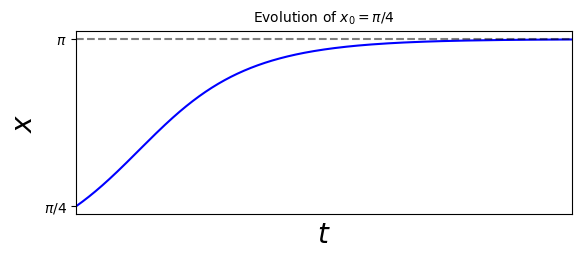

In [2]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

x = np.linspace(np.pi/4+0.00000001, np.pi-0.000001, 600) 
t = np.log( np.abs( (1/np.sin(np.pi/4) + 1/np.tan(np.pi/4)) / (1/np.sin(x) + 1/np.tan(x)) ) )
fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$t$', fontsize=20) # set the x label
ax.set_ylabel(r'$x$', fontsize=20) # set the y label
ax.set_title('Evolution of $x_0=\\pi/4$', fontsize=10) # set the title 

ax.plot(t, x, color='blue', linestyle='-', label='a sine curve') 

# change the axis ticks, labels, and aspect
ax.set_yticks([np.pi/4, np.pi])
ax.set_yticklabels(['$\\pi/4$', '$\\pi$'])
ax.set_xticks([])
ax.set_xlim(0,7)
ax.set_aspect(1)

# the axes:
ax.axhline(y=np.pi, color='k', alpha=0.5, ls='--')


plt.show() # show the plot here

A picture cannot tell us certain quantitative things, but can still give us a good understanding of the physical situation. We can then use numerical methods to understand the solutions quantitatively. 

The ideas can be extended to any one-dimensional system of the form $\dot{x} = f(x)$. 

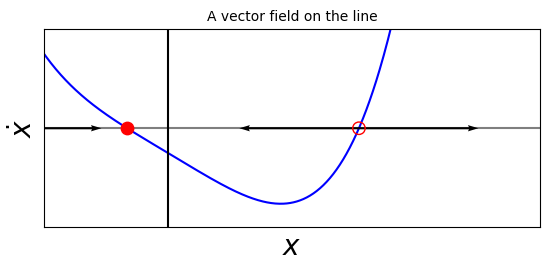

In [3]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

x = np.linspace(-2, 2, 600) # 
xdot = x**4 - 3*x - 1

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'$\dot{x}$', fontsize=20) # set the y label
ax.set_title('A vector field on the line', fontsize=10) # set the title 

# set the x and y limits:
ax.set_xlim(-1,3)
ax.set_ylim(-4,4)

# make one-dimensional plots using the above arrays, add a custom label, linestyles and colors:
ax.plot(x, xdot, color='blue', linestyle='-', label='a sine curve') 

# change the axis labels to correspond to [0, pi/2, pi, 1.5 * pi, 2*pi, 2.5*pi, 3*pi]
ax.set_xticks([])
ax.set_yticks([])

# plot the fixed points: 
xfpu = [1.5396]
yfpu = [0]
plt.scatter(xfpu, yfpu, s=80, facecolors='none', edgecolors='r', zorder=11)

# plot the fixed points: 
xfps = [-0.32941]
yfps = [0]
plt.scatter(xfps, yfps, s=80, facecolors='r', edgecolors='r', zorder=11)


# the axes:
ax.set_aspect(0.2)
ax.axhline(y=0, color='k', alpha=0.5)
ax.axvline(x=0, color='k')

# Vector origin location 
X = [1.5396, 1.539, -0.32941-0.8] 
Y = [0, 0, 0] 
  
# Directional vectors 
U = [2, -2, 0.32941+0.9]   
V = [0, 0,  0]   
# Creating plot 
plt.quiver(X, Y, U, V, color='black', units='xy', scale=1, zorder=10, width=0.035) 

plt.show() # show the plot here

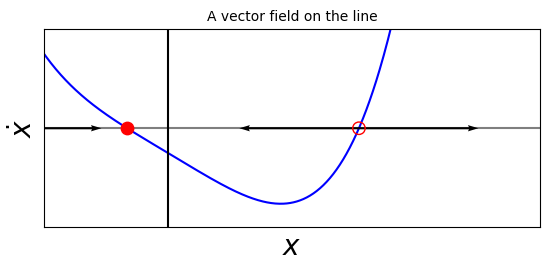

In [4]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

x = np.linspace(-2, 2, 600) # 
xdot = x**4 - 3*x - 1

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'$\dot{x}$', fontsize=20) # set the y label
ax.set_title('A vector field on the line', fontsize=10) # set the title 

# set the x and y limits:
ax.set_xlim(-1,3)
ax.set_ylim(-4,4)

# make one-dimensional plots using the above arrays, add a custom label, linestyles and colors:
ax.plot(x, xdot, color='blue', linestyle='-', label='a sine curve') 

# change the axis labels to correspond to [0, pi/2, pi, 1.5 * pi, 2*pi, 2.5*pi, 3*pi]
ax.set_xticks([])
ax.set_yticks([])

# plot the fixed points: 
xfpu = [1.5396]
yfpu = [0]
plt.scatter(xfpu, yfpu, s=80, facecolors='none', edgecolors='r', zorder=11)

# plot the fixed points: 
xfps = [-0.32941]
yfps = [0]
plt.scatter(xfps, yfps, s=80, facecolors='r', edgecolors='r', zorder=11)


# the axes:
ax.set_aspect(0.2)
ax.axhline(y=0, color='k', alpha=0.5)
ax.axvline(x=0, color='k')

# Vector origin location 
X = [1.5396, 1.539, -0.32941-0.8] 
Y = [0, 0, 0] 
  
# Directional vectors 
U = [2, -2, 0.32941+0.9]   
V = [0, 0,  0]   
# Creating plot 
plt.quiver(X, Y, U, V, color='black', units='xy', scale=1, zorder=10, width=0.035) 

plt.show() # show the plot here

This imaginary fluid is called the *phase fluid*, and the real line is the *phase space*.

To find a solution to $\dot{x} = f(x)$ starting from an arbitrary initial condition $x_0$, we place an imaginary particle (a *phase point*) at $x_0$ and watch how it is carried along by the flow. As time goes on, the phase point moves along the $x$-axis according to some function $x(t)$. This function is called the *trajectory* based at $x_0$, and it represents the solution to the differential equation starting from $x_0$. A picture like the one above, which shows qualitatively all the trajectories of the system, is called a *phase portrait*. 

The appearance of the phase portrait is controlled by the fixed points $x^*$, defined by $f(x^*)=0$. These are stagnation points of the flow. Solid dots are stable fixed points (the local flow is towards them), and open dots are unstable fixed points (the flow is away from them). 

In terms of the differential equation, the fixed points represent equilibrium solutions. An equlibrium is defined to be stable if all sufficiently small disturbances away from it damp out in time. Conversely, unstable equilibria, which disturbances grow in time, are represented by unstable fixed points. 

### Example 8.1: Find all the fixed points for \dot{x} = x^2 -1, and classify their stability.

We note here that the definition of stable equilibrium is based on *small* disturbances: large disturbances may fail to decay. To emphasize this aspect of stability, we may characterize a fixed point as *locally stable* and not globally stable. 

## Linear Stability Analysis

We would like to have a more quantitative measure of stability, such as the rate of decay to a stable fixed point. To achieve this, we *linearize* about a fixed point. 

Let $x^*$ be a fixed point and consider a small perturbation $\eta(t)$ away from $x^*$: $x(t) = x^* + \eta(t)$. Evidently, since $x^*$ is a constant: 

$\dot{\eta} = \dot{x}$, and so: $\dot{\eta} = f(x) = f(x^* + \eta)$. 

If we now Taylor-expand the right-hand side: 

$\dot{\eta} = f(x^*) + \eta f'(x^*) + \mathcal{O}(\eta^2)$,

where $' \equiv \mathrm{d}/\mathrm{d}x$.

Since $f(x^*) = 0$ for the fixed point $x^*$, and neglecting the terms $\mathcal{O}(\eta^2)$, we have:

$\dot{\eta} \approx \eta f'(x^*)$. 

This is a linear equation in $\eta$, known as the *linearization* about $x^*$. It shows that the perturbation grows exponentially if $f'(x^*) > 0$, and decays if $f'(x^*) < 0$, since: 

$\eta(t) \approx \eta(0) \exp( f'(x^*) t)$.

Therefore, the slope, $f'(x^*)$ at the fixed point determines its stability. 

The value $|1/f'(x^*)|$ is a characteristic time scale, and determines the time required for $x(t)$ to vary significantly in the neighborhood of $x^*$. 

### Example 8.2: Use linearization to determine the stability of the fixed points for \dot{x} = \sin x. 

## Two-Dimensional Systems

Let's now consider the simplest class of a higher-dimensional system, one in two dimensions (2D). We will start with *linear* systems, which are interesting in their own right, but play an important role in the classification of fixed points of nonlinear systems. 

### 2D Linear Systems

A 2D linear system is defined by: 

$\dot{x} = a x + b y$,

$\dot{y} = c x + d y$.

This can be written compactly in matrix form as:

$\mathbf{\dot{x}} = A \mathbf{x}$,

where $\mathbf{x} = \left(\matrix{x\\y}\right)$, and $A = \left(\matrix{a & b\\ c & d}\right)$.

In this case, $\mathbf{\dot{x}} = \mathbf{0}$ when $\mathbf{x} = \mathbf{0}$, and therefore $\mathbf{x}^* = \mathbf{0}$ for any choice of $A$. 

The solutions of $\mathbf{\dot{x}} = A \mathbf{x}$ can be visualized as trajectories moving on the $(x,y)$ plane, in this context called the *phase plane*. 



### Example 8.3: Analysis of the Simple Harmonic Oscillator.

Vibrations of a mass hanging from a linear spring are governed by the linear differential equation: 

$m \ddot{x} + kx = 0$, where $m$ is the mass, $k$ is the spring constant, and $x$ is the displacement of the mass from equilibrium. 

Give a phase plane analysis of this simple harmonic oscillator. 

### Classification of Linear Systems

Let's discuss a more general approach of the classification of linear systems, by examining an example system:

$\mathbf{\dot{x}} = A \mathbf{x}$,

where: $A = \left(\matrix{a & 0\\ 0 & -1}\right)$.

Multiplying out:

$\dot{x} = ax$,

$\dot{y} = -y$.

Therefore, the equations are *uncoupled*: there's no $x$ in the $y$-equation and vice versa. In this simple case, the equation may be solved separately: 

$x(t) = x_0 e^{at}$,

$y(t) = y_0 e^{-t}$. 

The phase portraits are shown below for different values of the parameter $a$. In each case, $y(t)$ decays exponentially. When $a<0$, $x(t)$ also decays exponentially, and so all trajectories approach the origin as $t\rightarrow \infty$. However, the direction of approach depends on the size of $a$ compared to -1. 

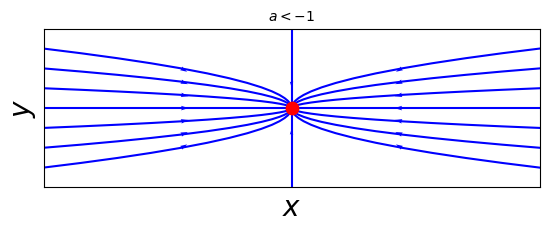

In [5]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

# the parameter a:
a = -2

# the initial condition combinations: 
x0 = [-2, 2, 0, 0, 2, 2, 2, 2, 2, 2, -2, -2, -2, -2, -2, -2]
y0 = [0, 0, 2, -2, 3, 2, 1, -3, -2, -1, 3, 2, 1, -3, -2, -1]



#t = np.concatenate((np.linspace(-2, -0.1,100),np.geomspace(-0.1, 1E-6, 1000)))
#t = np.concatenate((t,np.geomspace(1E-6, 0.1, 1000)))
#t = np.concatenate((t,np.linspace(-2, 2,100)))

t = np.logspace(-4,1,100)

x = [xz*np.exp(a*t) for xz in x0]
y = [yz*np.exp(-t) for yz in y0]



fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'$y$', fontsize=20) # set the y label
ax.set_title('$a<-1$', fontsize=10) # set the title 

# set the x and y limits:
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-2.0,2.0)

# make one-dimensional plots using the above arrays, add a custom label, linestyles and colors:
for i in range(len(x)):
    a1 = 80
    fac = 0.06
    fac2 = 0.045
    wa = 0.04
    #print(x[i][a1], y[i][a1])
    ax.plot(x[i], y[i], color='blue', linestyle='-')
    plt.quiver(x[i][a1], y[i][a1], fac*a*x0[i]*np.exp(a*t[i])/np.sqrt( (a*x0[i]*np.exp(a*t[i]))**2 + (y0[i]*np.exp(-t[i]))**2) , -fac2*y0[i]*np.exp(-t[i])/np.sqrt( (a*x0[i]*np.exp(a*t[i]))**2 + (y0[i]*np.exp(-t[i]))**2), color='b', units='xy', scale=1, zorder=10, width=wa) 


# change the axis labels to correspond to [0, pi/2, pi, 1.5 * pi, 2*pi, 2.5*pi, 3*pi]
ax.set_xticks([])
ax.set_yticks([])

# plot the fixed points: 
#xfpu = [1]
#yfpu = [0]
#plt.scatter(xfpu, yfpu, s=80, facecolors='none', edgecolors='r', zorder=11)

# plot the fixed points: 
xfps = [0]
yfps = [0]
plt.scatter(xfps, yfps, s=80, facecolors='r', edgecolors='r', zorder=11)


# the axes:
ax.set_aspect(0.08)
#ax.axhline(y=0, color='k', alpha=0.5)
#ax.axvline(x=0, color='k')

plt.show() # show the plot here

For $a<-1$, $x(t)$ decays more rapidly than $y(t)$. The trajectories approach the origin tangent to the slower direction. $\mathbf{x}^* = \mathbf{0}$ is a *stable node*. 

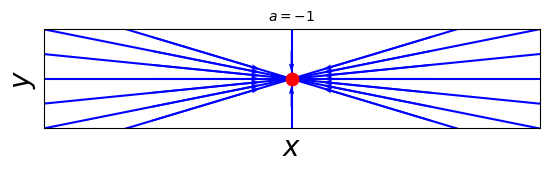

In [6]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

# the parameter a:
a = -1

# the initial condition combinations: 
x0 = [-2, 2, 0, 0, 2, 2, 2, 2, 2, 2, -2, -2, -2, -2, -2, -2]
y0 = [0, 0, 2, -2, 3, 2, 1, -3, -2, -1, 3, 2, 1, -3, -2, -1]

t = np.logspace(-4,1,100)

x = [xz*np.exp(a*t) for xz in x0]
y = [yz*np.exp(-t) for yz in y0]

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'$y$', fontsize=20) # set the y label
ax.set_title('$a=-1$', fontsize=10) # set the title 

# set the x and y limits:
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)

# make one-dimensional plots using the above arrays, add a custom label, linestyles and colors:
for i in range(len(x0)):
    a1 = 85
    fac = 5
    wa = 0.005
    #print(x[i][a1], y[i][a1])
    ax.plot(x[i], y[i], color='blue', linestyle='-')
    plt.quiver(x[i][a1], y[i][a1], fac*(x[i][a1+1]-x[i][a1]), y[i][a1+1]-y[i][a1], color='b', units='xy', scale=1, zorder=10, width=wa) 


# change the axis labels to correspond to [0, pi/2, pi, 1.5 * pi, 2*pi, 2.5*pi, 3*pi]
ax.set_xticks([])
ax.set_yticks([])

# plot the fixed points: 
#xfpu = [1]
#yfpu = [0]
#plt.scatter(xfpu, yfpu, s=80, facecolors='none', edgecolors='r', zorder=11)

# plot the fixed points: 
xfps = [0]
yfps = [0]
plt.scatter(xfps, yfps, s=80, facecolors='r', edgecolors='r', zorder=11)


# the axes:
ax.set_aspect(0.2)
#ax.axhline(y=0, color='k', alpha=0.5)
#ax.axvline(x=0, color='k')

plt.show() # show the plot here

When $a=-1$, all trajectories are straight lines through the origin. This occurs because the decay rates in the two directions are precisely equal. In this case $\mathbf{x}^*$ is called a symmetrical node or a *star*.

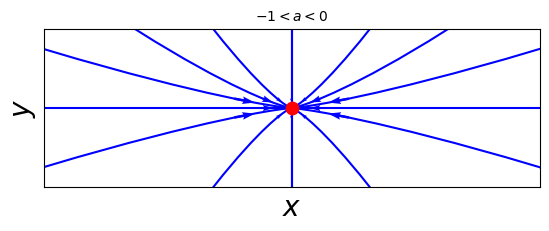

In [7]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

# the parameter a:
a = -0.8

# the initial condition combinations: 
x0 = [-2, 2, -2, 2, 0, 0, -4, 4, -1, 1, 0, 0, -4, 4, -1, 1]
y0 = [0, 0, 20, 20, 20, 20, 20, 20, 20, 20, -20, -20, -20, -20, -20, -20]



#t = np.concatenate((np.linspace(-2, -0.1,100),np.geomspace(-0.1, 1E-6, 1000)))
#t = np.concatenate((t,np.geomspace(1E-6, 0.1, 1000)))
#t = np.concatenate((t,np.linspace(-2, 2,100)))

t = np.logspace(-4,1,100)

x = [xz*np.exp(a*t) for xz in x0]
y = [yz*np.exp(-t) for yz in y0]



fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'$y$', fontsize=20) # set the y label
ax.set_title('$-1<a<0$', fontsize=10) # set the title 

# set the x and y limits:
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-2.0,2.0)

# make one-dimensional plots using the above arrays, add a custom label, linestyles and colors:
for i in range(len(x)):
    a1 = 92
    fac = 4
    fac2 = 1.5
    wa = 0.02
    #print(x[i][a1], y[i][a1])
    ax.plot(x[i], y[i], color='blue', linestyle='-')
    plt.quiver(x[i][a1], y[i][a1], fac*(x[i][a1+1]-x[i][a1]), fac2*y[i][a1+1]-y[i][a1], color='b', units='xy', scale=1, zorder=10, width=wa) 

# change the axis labels to correspond to [0, pi/2, pi, 1.5 * pi, 2*pi, 2.5*pi, 3*pi]
ax.set_xticks([])
ax.set_yticks([])

# plot the fixed points: 
#xfpu = [1]
#yfpu = [0]
#plt.scatter(xfpu, yfpu, s=80, facecolors='none', edgecolors='r', zorder=11)

# plot the fixed points: 
xfps = [0]
yfps = [0]
plt.scatter(xfps, yfps, s=80, facecolors='r', edgecolors='r', zorder=11)


# the axes:
ax.set_aspect(0.08)
#ax.axhline(y=0, color='k', alpha=0.5)
#ax.axvline(x=0, color='k')

plt.show() # show the plot here

When $-1 < a < 0$, we again have a stable node, but now the trajectories approach $\mathbf{x}^*$ along the $x$-direction, which is the more slowly decaying direction. 

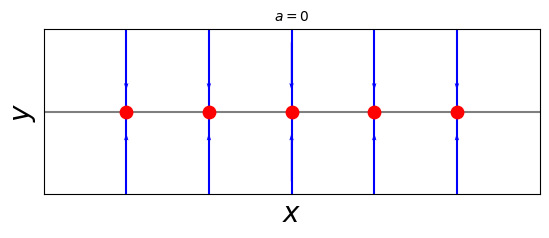

In [8]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

# the parameter a:
a = 0

# the initial condition combinations: 
x0 = [-2, -1, 0, 1, 2, -2, -1, 0, 1, 2]
y0 = [20, 20, 20, 20, 20, -20, -20, -20, -20, -20]

#t = np.concatenate((np.linspace(-2, -0.1,100),np.geomspace(-0.1, 1E-6, 1000)))
#t = np.concatenate((t,np.geomspace(1E-6, 0.1, 1000)))
#t = np.concatenate((t,np.linspace(-2, 2,100)))

t = np.logspace(-4,1,100)

x = [xz*np.exp(a*t) for xz in x0]
y = [yz*np.exp(-t) for yz in y0]

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'$y$', fontsize=20) # set the y label
ax.set_title('$a=0$', fontsize=10) # set the title 

# set the x and y limits:
ax.set_xlim(-3,3)
ax.set_ylim(-2.0,2.0)

# make one-dimensional plots using the above arrays, add a custom label, linestyles and colors:
for i in range(len(x)):
    a1 = 87
    fac = 4
    fac2 = 1.5
    wa = 0.02
    #print(x[i][a1], y[i][a1])
    ax.plot(x[i], y[i], color='blue', linestyle='-')
    plt.quiver(x[i][a1], y[i][a1], 0, fac2*(y[i][a1+1]-y[i][a1]), color='b', units='xy', scale=1, zorder=10, width=wa) 

# change the axis labels to correspond to [0, pi/2, pi, 1.5 * pi, 2*pi, 2.5*pi, 3*pi]
ax.set_xticks([])
ax.set_yticks([])

# plot the fixed points: 
#xfpu = [1]
#yfpu = [0]
#plt.scatter(xfpu, yfpu, s=80, facecolors='none', edgecolors='r', zorder=11)

# plot the fixed points: 
xfps = [-2, -1, 0, 1, 2]
yfps = [0, 0, 0, 0, 0]
plt.scatter(xfps, yfps, s=80, facecolors='r', edgecolors='r', zorder=11)


# the axes:
ax.set_aspect(0.5)
ax.axhline(y=0, color='k', alpha=0.5)
#ax.axvline(x=0, color='k')

plt.show() # show the plot here

Something dramatic happens when $a=0$: there's an *entire line* of fixed points along the $x$-axis. All trajectories approach these fixed points along vertical lines. 

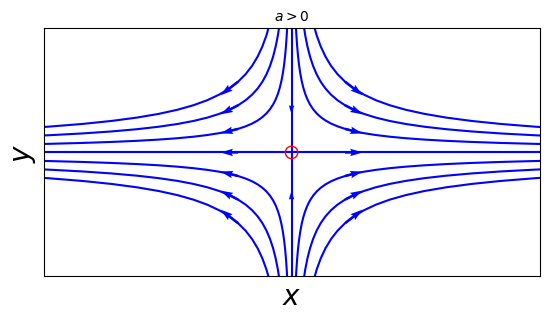

In [9]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

# the parameter a:
a = 1.5

# the initial condition combinations: 
x0 = [-2, 2, 0, 0, 2, 2, 2, 2, 2, 2, -2, -2, -2, -2, -2, -2]
y0 = [0, 0, 2, -2, 3, 2, 1, -3, -2, -1, 3, 2, 1, -3, -2, -1]

#t = np.concatenate((np.linspace(-2, -0.1,100),np.geomspace(-0.1, 1E-6, 1000)))
#t = np.concatenate((t,np.geomspace(1E-6, 0.1, 1000)))
#t = np.concatenate((t,np.linspace(-2, 2,100)))

t = np.linspace(-5,5,100)

x = [xz*np.exp(a*t) for xz in x0]
y = [yz*np.exp(-t) for yz in y0]

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'$y$', fontsize=20) # set the y label
ax.set_title('$a>0$', fontsize=10) # set the title 

# set the x and y limits:
ax.set_xlim(-10,10)
ax.set_ylim(-5.0,5.0)

# make one-dimensional plots using the above arrays, add a custom label, linestyles and colors:
for i in range(len(x)):
    a1 = 50
    fac = 2
    wa = 0.10
    ax.plot(x[i], y[i], color='blue', linestyle='-')
    plt.quiver(x[i][a1], y[i][a1], fac*(x[i][a1+1]-x[i][a1]), fac*(y[i][a1+1]-y[i][a1]), color='b', units='xy', scale=1, zorder=10, width=wa) 


# change the axis labels to correspond to [0, pi/2, pi, 1.5 * pi, 2*pi, 2.5*pi, 3*pi]
ax.set_xticks([])
ax.set_yticks([])

# plot the fixed points: 
xfpu = [0]
yfpu = [0]
plt.scatter(xfpu, yfpu, s=80, facecolors='none', edgecolors='r', zorder=11)

# plot the fixed points: 
#xfps = [0]
#yfps = [0]
#plt.scatter(xfps, yfps, s=80, facecolors='r', edgecolors='r', zorder=11)

# the axes:
ax.set_aspect(1)
ax.axhline(y=0, color='b', alpha=0.5)
#ax.axvline(x=0, color='k')

plt.show() # show the plot here

Finally, when $a>0$, $\mathbf{x}^*=\mathbf{0}$ becomes unstable, due to the exponential growth in the $x$-direction. Most trajectories veer away from $\mathbf{x}^*$ and head out to infinity, with the exception of those that start on the $y$-axis. Here $\mathbf{x}^*$ is called a *saddle point*. 

In general, if $\mathbf{x}^*$ is an attracting fixed point if all trajectories that start near it approach it as $t \rightarrow \infty$. If *all* the trajectories in the phase plane are attracted to it, it is also *globally attracting* 

We say that a fixed point $\mathbf{x}^*$ is *Liapunov stable* if all trajectories that start sufficintly close to it, remain close to it for all time. E.g., the case of $a=0$ in the aboce example is Liapunov stable, but not attractive. When a fixed point is Liapunov stable but not attractive, we say that it is *neutrally stable*. In that case, nearby trajectories are neither attracted nor repelled from a neutrally stable fixed point.  

The equilibrium point of a SHO is neutrally stable. Neutral stability is commonly encountered in mechanical systems in the absence of friction.

If a fixed point is Liapunov stable and attracting, we call it *stable* or *asymptotically stable*. If the fixed point is unstable, it can be neither attractive nor Liapunov stable. 

Let's study the general case of a two-dimensional linear system i.e. described by a $2 \times 2$ matrix, with the aim of classifying all the possible phase portraits that can occur. 

In the example of the preceding section, the $x$- and $y$-axes played a crucial geometric role. They determined the direction of the trajectories as $t\rightarrow \pm \infty$. They also contained special straight-line trajectories: a trajectory starting on one of the coordinate axes stayed on that axis forever, and exhibited simple exponential growth or decay along it. 

For the general case, we would like to find the analog of these straight line trajectories. 

That is, we seek trajectories of the form: 

$\mathbf{x}(t) = e^{\lambda t} \mathbf{v}$, 

where $\mathbf{v} \neq \mathbf{0}$ is some *fixed* vector to be determined, and $\lambda$ is a growth rate, also to be determined. If such solutions exist, they correspond to exponential motion along the line spanned by the vector $\mathbf{v}$. 

To find the conditions on $\mathbf{v}$ and $\lambda$, we substitute $\mathbf{x}(t) = e^{\lambda t} \mathbf{v}$ into $\mathbf{\dot{x}} = A \mathbf{x}$, to obtain:

$ \lambda e^{\lambda t} \mathbf{v} = \lambda e^{\lambda t} A \mathbf{v}$,

to obtain:

$ \lambda \mathbf{v} = A \mathbf{v}$,

which tells us that the desired straight line solutions exist if $\mathbf{v}$ is an *eigenvector* of $A$ with corresponding *eigenvalue* $\lambda$. 

For the case of $A = \left(\matrix{a & b\\ c & d}\right)$, the characteristic equation becomes:

$\mathrm{det}\left(\matrix{a & b\\ c & d}\right) = 0$, 

which yields:

$\lambda^2 + \tau \lambda + \Delta =0$,

with $\tau = \mathrm{Tr}(A) = a + d$ and $\Delta = \mathrm{det}(A) = ad - bc$. 

Then: 

$\lambda_{1,2} = \frac{ \tau \pm \sqrt{\tau^2 - 4 \Delta} } { 2}$,

are the solutions of the quadratic equation.

The typical situation is to have distinct eigenvalues $\lambda_1 \neq \lambda_2$, in this case linear algebra tells us that the corresponding eigenvectors $\mathbf{v_1}$ and $\mathbf{v_2}$ are *linearly independent*, and hence they span the entire plane. 

For example, any initial condition $\mathbf{x_0}$ can be written as a linear combination of eigenvectors, say:

$\mathbf{x_0} = c_1 \mathbf{v_1} + c_2 \mathbf{v_2}$. Then, the *general solution* for $\mathbf{x}(t)$ is simply:

$\mathbf{x}(t) = c_1 e^{\lambda_1 t} \mathbf{v_1} + c_2 e^{\lambda_2 t}\mathbf{v_2}$. 

(It satisfies the initial condition and it is a linear combination of solutions, hence it is itself a solution.)


### Example 8.4: Solve the initial value problem \dot{x} = x + y, \dot{y} = 4 x - 2y with initial condition (x_0, y_0) = (2,-3). 

Fortunately, we don't need to go through the procedure of Example 8.4 to draw the phase portraot of a linear system: all we need to know are the eigenvalues and eigenvectors:

If $\lambda_1, \lambda_2 < 0$, there exists a stable fixed point at the origin. If on the other hand $\lambda_1, \lambda_2 > 0$, the node is unstable. If one of the eigenvalues is positive and the other negative, the node is a saddle point. 

What if the eigenvalues are complex? Then the solution is a *center* or a (stable or unstable) *spiral*. 

if the eigenvalues are equal, then we have a *star node*. 

(And if there's only one eigenvalue, the fixed point is a *degenerate node*). 

## The Phase Plane and Phase Portraits 

Our goal here of course is to study nonlinear systems. In 2D, the general form of a vector field on the phase plane is given by: 

$\dot{x}_1 = f_1(x_1, x_2)$,

$\dot{x}_2 = f_2(x_1, x_2)$,

where $f_{1,2}$ are given functions. 

We may also write the system more compactly in vector notation as: 

$\mathbf{\dot{x}} = \mathbf{f}(\mathbf{x})$, where $\mathbf{x} = (x_1, x_2)$ and $\mathbf{f}(\mathbf{x}) = (f_1(\mathbf{x}), f_2(\mathbf{x}))$. 

Here, $\mathbf{x}$ represents a point on the phase plane and $\mathbf{\dot{x}}$ is the velocity vector at that point. By flowing along the vector field, a phase point traces out a solution $\mathbf{x}(t)$, corresponding to a trajectory winding through the phase plane. 

Furthermore, the entire phase plane is filled with trajectories, since each point can play the role of an initial condition. 

For nonlinear systems, there's typically no hope of finding the trajectories analytically. Even when explicit formulas are available, they are often too complicated to provide much insight. Instead, we wish to determine first the qualitative behavior of the solutions by analytical considerations, and to probe the quantitative aspects numerically. 

## Fixed Points and Linearization

To examine the nature of fixed points of nonlinear systems, we can apply the *linearization* technique in two dimensions. 

Consider the system: 

$\dot{x} = f(x,y)$,

$\dot{y} = g(x,y)$,

and suppose that $(x^*, y^*)$ is a fixed point, i.e.:

$f(x^*, y^*) = 0$ and $g(x^*, y^*) = 0$.

Let $u = x - x^*$ and $v = y-y^*$ be small disturbances from the fixed point.

To see whether the disturbance grows or decays, we need to derive differential equations for $u$ and $v$: 

$\dot{u} = \dot{x} = f(x^* + u, y^* + v)$.

Taylor-expand the function on the right-hand side about $(x^*, y^*)$ to get: 

$\dot{u} = f(x^*, y^*) + u \frac{\partial f}{\partial x} + v \frac{\partial f}{\partial y}  + \mathcal{O}(u^2, v^2, uv)$.

Since $f(x^*, y^*) = 0$, we end up with:

$\dot{u} = u \left.\frac{\partial f}{\partial x}\right|_* + v \left.\frac{\partial f}{\partial y}\right|_*  + \mathcal{O}(u^2, v^2, uv)$.

Similarly, for $v$, we get: 

$\dot{v} = u \left.\frac{\partial g}{\partial x}\right|_*  + v \left.\frac{\partial g}{\partial y}\right|_*   + \mathcal{O}(u^2, v^2, uv)$,

where the $*$ denotes that the derivatives are evaluated at the fixed point. 

Hence, the disturbance $(u,v)$, evolves according to:

$\left(\matrix{\dot{u}\\\dot{v}}\right) = \left(\matrix{\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y}\\ \frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}}\right)_{(x^*, y^*)} \left(\matrix{u\\v}\right) + \mathrm{quadratic~terms}$. 

You may recognize: $J = \left(\matrix{\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y}\\ \frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}}\right)_{(x^*, y^*)} $ as the Jacobian matrix!

Now, since the quadratic terms are tiny, it is tempting to neglect them altogether and obtain a linearized system: 

$\left(\matrix{\dot{u}\\\dot{v}}\right)=\left(\matrix{\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y}\\ \frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}}\right)_{(x^*, y^*)} \left(\matrix{u\\v}\right)$,

which we know how to analyze!

Is it really safe to neglect the quadratic terms? The answer is yes, as long as the fixed point for the linearized system is not a borderline case (center, degenerate node, star or non-isolated fixed point). 

If the linearized system predicts a saddle, node, or a spiral, then the fixed point *really* is a saddle, node or spiral for the original nonlinear system. 

### Example 8.5: Consider the system \dot{x} = x + e^{-y} and \dot{y} = -y. First use qualitative arguments to obtain information about the phase portrait. Then, use the Runge-Kutta method to compute several trajectories, and plot them on the phase plane. 

## The Lorenz Equations and Chaos

We begin our brief introduction to the concept of chaos with the Lorenz equations:

$\dot{x} = \sigma( y - x)$,

$\dot{y} = rx - y - xz$,

$\dot{z} = xy - bz$, 

where $\sigma, r, b > 0$ are parameters. 

Ed Lorenz (1963) derived this three-dimensional system from a drastically simplified model of convection rolls in the atmosphere. 

![Convection Rolls (wikipedia)](https://upload.wikimedia.org/wikipedia/commons/f/fd/Convrolls.PNG)

The same equations also arise in models of lasers and dynamos, and they describe exactly the motion of a certain whaterwheel. 

https://en.wikipedia.org/wiki/File:Malkus_Waterwheel_side_by_side.webm

Lorenz discovered that this simple-looking, deterministic system could have extremely erratic dynamics. In particular, over a wide range of parameters, the solutions oscillate irregularly, never exactly repeating, but always remaining in a bounded region of phase space. 

When he plotted the trajectories in 3D, he discovered that they settled onto a complicated set, now known as a *strange attractor*, a fractal with dimension between 2 and 3. 

## Simple Properties of the Lorenz Equations

$\dot{x} = \sigma( y - x)$,

$\dot{y} = rx - y - xz$,

$\dot{z} = xy - bz$.

Τhe $\sigma$ parameter is also known as the Prandtl number, $r$ is known as the Rayleigh number and $b$ has no name (in the convection problem it is related to the aspect ratio of the convection rolls). 

The system has two nonlinearities: $xy$ and $xz$. There's also a symmetry: $(x,y) \rightarrow (-x, -y)$ which leaves the equations unchanged. 

The point $(x^*, y^*, z^*) = (0,0,0)$ is a fixed point for all values of the parameters. For $r>1$, there's also a symmetric pair of fixed points at:

$x^* = y^* = \pm \sqrt{b(r-1)}$, $z^* = r-1$, called $C^+$ and $C^-$, respectively. As $r \rightarrow 1^+$, $C^+$ and $C^-$ coalesce with the origin. 

### Linear Stability of the Origin

Linearizing the Lorenz equations at the origin, we get:

$\dot{x} = \sigma(y-x)$,

$\dot{y} = rx -y$, 

$\dot{z} = -bz$.

The equation for $z$ is decoupled and shows that $z(t) \rightarrow 0$ exponentially fast. The other two directions are governed by the system: 


$\left(\matrix{\dot{x}\\\dot{y}}\right) =\left(\matrix{-\sigma & \sigma\\ r & -1}\right) \left(\matrix{x\\ y}\right)$,

with trace $\tau = -\sigma -1 < 0$ and determinant $\Delta = \sigma(1 -r)$. 

if $r>1$ the origin is a saddle point because $\Delta < 0$. Note that this is a new type of saddle point, since the full system is 3D. If $r<1$ all the directions are incoming and the origin is a sink and a stable node. 

Moreover, it can be shown that for $r<1$ that every trajectory approaches the origin as $t \rightarrow \infty$, and therefore the origin is *globally* stable. 

For a range of $r$: $1 < r < r_H =\frac{ \sigma (\sigma + b + 3) }{\sigma - b -1}$ (assuming $\sigma - b - 1 > 0$), the fixed points $C^{\pm}$ are linearly stable.

For $ r > r_H$, trajectories have a bizarre kind of long-term behavior. Like balls in a pinball machine, they are repelled from one unstable object after another. At the same time, they are confined to a bounded set of zero volume, yet they manage to move on this set forever, without intersecting themselves or others. 

### Exercise 8.1: Chaos on a Strange Attractor 

(See file Exercise8.1.ipynb)

### The Definition of Chaos

No definition of "chaos" is universally accepted, but almost everyone would agree on three ingredients used in the following working definition:

"Chaos is aperiodic long-term behavior in a deterministic system that exhibits sensitive dependence on initial conditions."

1. "Aperiodic long-term behavior" implies that the trajectories do not settle down to fixed points, periodic orbits, or quasiperiodic orbits as $t\rightarrow \infty$. For practical reasons, we require that such trajectories are not too rare.
2. "Deterministic" means that the system has no random or noisy inputs or parameters. The irregular behavior of the system arises from the system's nonlinearity, rather than from noisy driving forces.
3. "Sensitive dependence on initial conditions" means that nearby trajectories separate exponentially fast, i.e. the system has positive Liapunov exponent. 

## Lorenz Attractor Animation

We end this chapter with an animation of the Lorenz Attractor, demonstrating the exponential deviation of two trajectories with similar initial conditions. 

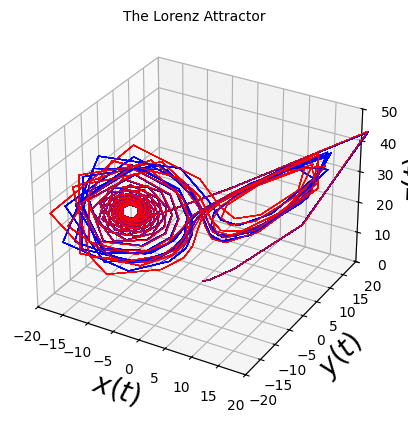

KeyboardInterrupt: 

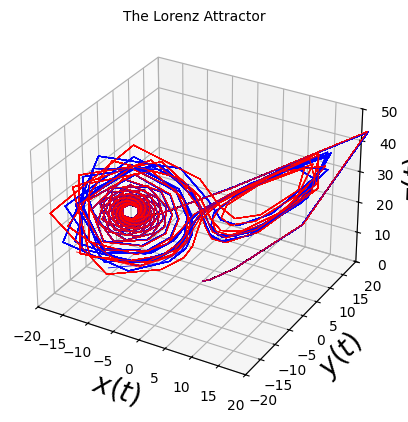

In [10]:
import scipy
import numpy as np
from IPython import display
import matplotlib.pyplot as plt

# the name of the function is: 
# scipy.integrate.solve_ivp, which by default uses the Runge-Kutta "45" method,
# a modified version of the Runge-Kutta 4-th order algo that has a variable step size. 

# fix the parameters to have the values that Lorenz used: 
sigma = 10
r = 28
b = 8/3

# first define the function vector
# y is a 3D vector here! t is necessary as well, but our function does not depend on time here
def func(t, y): 
    """Returns the function vector"""
    return [sigma * (y[1] - y[0]), 
            r * y[0] - y[1] - y[0] * y[2],
            y[0] * y[1] - b * y[2]]

# Now get the solution:
y0 = [0, 1, 0]
solarray = []
tmax = 100
t_eval = np.linspace(0, tmax, 1000)
t_range = (0, tmax)
sol = scipy.integrate.solve_ivp(func, t_range, y0, t_eval=t_eval)
y0 = [0, 1+1E-2, 0]
sol2 = scipy.integrate.solve_ivp(func, t_range, y0, t_eval=t_eval)

# PLOT:

dynamicdisplay = display.display("", display_id=True)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}) # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$x(t)$', fontsize=20) # set the x label
ax.set_ylabel(r'$y(t)$', fontsize=20) # set the y label
ax.set_zlabel(r'$z(t)$', fontsize=20) # set the y label

ax.set_title('The Lorenz Attractor', fontsize=10) # set the title 

# set the x and y limits:
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_zlim(0,50)


for i, ti in enumerate(sol.t):
    ax.plot(sol.y[0][:i], sol.y[1][:i], sol.y[2][:i], color='blue', linestyle='-', marker='o', lw=0.6, ms=0)
    ax.plot(sol2.y[0][:i], sol2.y[1][:i], sol2.y[2][:i], color='red', linestyle='-', marker='o', lw=0.6, ms=0)
    dynamicdisplay.update(fig)
